## Stock Market Analysis using Python, pandas, NumPy

The aim of the project was to extract information about various technology stocks mainly - Google, Apple, Microsoft and Amazon from the online stock trading sites - Yahoo Finance and to visualize different aspects of the stocks like the Adjusted Closing Prices, Volumes of stocks traded on a particular day, moving averages of the closing price-to get a basic idea of which way the price is moving by cutting down noise from the data and the daily returns on the stocks. Correlation plots were created for the daily percentage return and Closing prices of the stocks to check how correlated two stocks are. It was obvious that all technology stocks are positively correlated but few like Amazon and Microsoft were highly correlated with each other. The information gathered on daily percentage returns was further used for Risk Analysis by calculating the Expected Return (Average / mean return of the stock) and standard deviation (measurement of Risk -> Greater the std. dev. greater is the risk and vice versa). A scatter plot was created for comparing the Expected return of stocks to its risk. This helped in visualizing the risk factor of various stocks (stocks with high standard deviation and low return).

In [23]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import yfinance as yf
import pandas as pd
import datetime

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For division in Python 3
from __future__ import division

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [24]:
# Lista de acciones tecnológicas (puedes ajustarla)
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Definir el rango de fechas
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 1, 1)

# For loop para descargar los datos y almacenarlos como DataFrame
stock_data = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Mostrar los primeros registros de Apple como ejemplo
print(stock_data['AAPL'].head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937302   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [25]:
# Summary Stats for Apple stocks
stock_data['AAPL'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,172.256681,173.857520,170.981880,172.549000,171.470440,5.921703e+07
std,17.530359,17.261055,17.535099,17.331672,17.437953,1.777392e+07
min,126.010002,127.769997,124.169998,125.019997,123.855087,2.404830e+07
25%,161.555000,162.387501,160.699997,162.112499,160.847198,4.781208e+07
50%,175.244995,177.025002,173.840004,175.475006,174.581657,5.507750e+07
75%,186.805000,188.095001,185.174995,187.330002,186.470264,6.574292e+07
max,198.020004,199.619995,197.000000,198.110001,197.361069,1.543573e+08


In [26]:
# General Info about Apple Stock
stock_data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

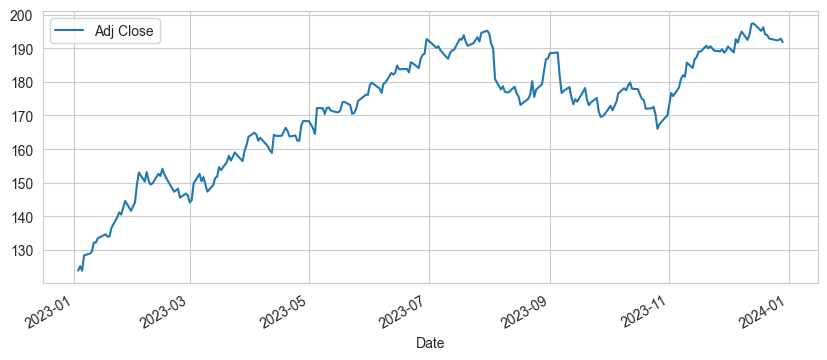

In [27]:
# Historical view of the closing price of Apple stock
stock_data['AAPL']['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

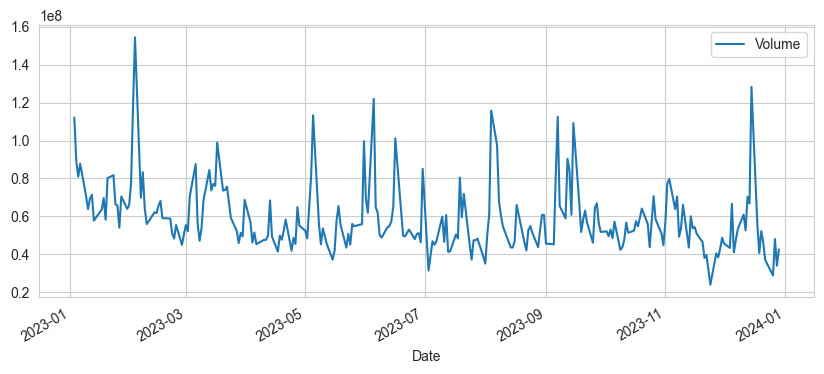

In [28]:
# Historical view of the total volume of Apple stock traded each day
stock_data['AAPL']['Volume'].plot(legend=True,figsize=(10,4))

In [29]:
# Calculation of moving averages for 10, 20 and 50 days of Apple stocks
symbol = 'AAPL'
stock_data_apple = yf.download(symbol, start='2023-01-01', end='2024-09-11')

# Calcular los Promedios Móviles de la acción específica 'AAPL'
stock_data['AAPL']['MA for 10 days'] = stock_data['AAPL']['Adj Close'].rolling(window=10).mean()
stock_data['AAPL']['MA for 20 days'] = stock_data['AAPL']['Adj Close'].rolling(window=20).mean()
stock_data['AAPL']['MA for 50 days'] = stock_data['AAPL']['Adj Close'].rolling(window=50).mean()

[*********************100%***********************]  1 of 1 completed


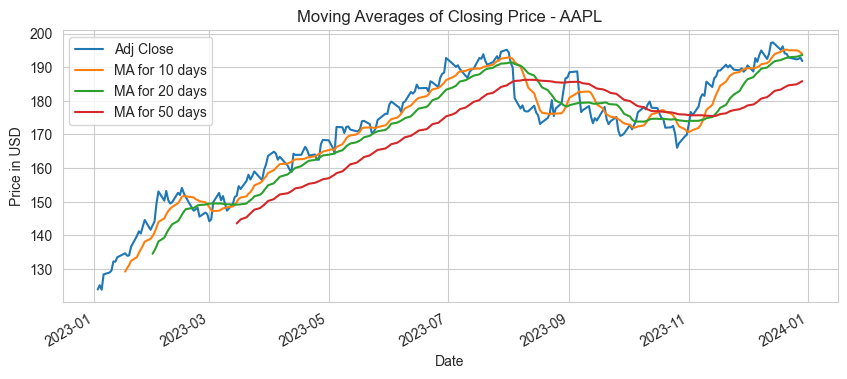

In [30]:
# Graficar los precios de cierre ajustados ('Adj Close') y los Promedios Móviles para 'AAPL'
stock_data['AAPL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(10, 4))

plt.title(f'Moving Averages of Closing Price - {symbol}')
plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [31]:
#Calculation to find he percent change for each day of Apple stock
stock_data['AAPL']['Daily Return'] = stock_data['AAPL']['Adj Close'].pct_change()

<Axes: xlabel='Date'>

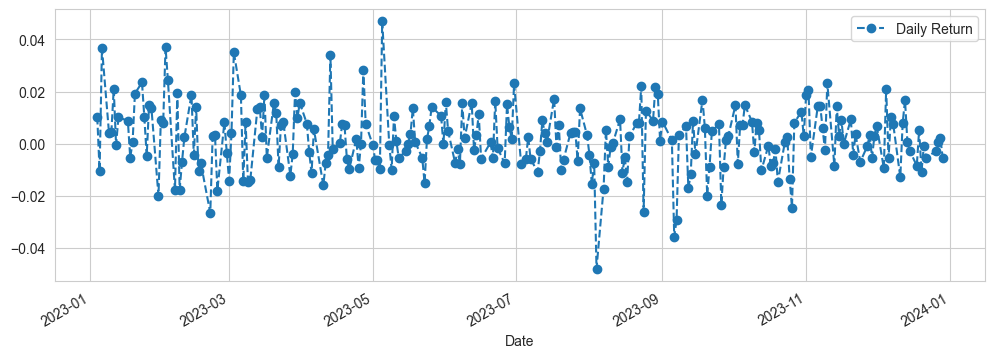

In [32]:
# Visualization of the percent change for each day of Apple stock
stock_data['AAPL']['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

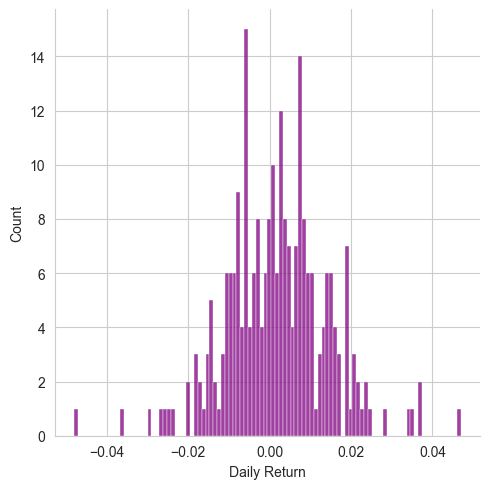

In [34]:
# Histogram to visualiza the average daily return of Apple stock
sns.displot(stock_data['AAPL']['Daily Return'].dropna(),bins=100,color='purple')

In [38]:
# Calculation to grab all the closing prices for the tech stock list into one DataFrame
# Descargar los datos de Yahoo Finance
data = yf.download(['AAPL', 'GOOG', 'MSFT', 'AMZN'], start='2023-01-01', end='2024-09-11')

# Extraer solo los precios de cierre ajustados
closing_df = data['Adj Close']


[*********************100%***********************]  4 of 4 completed


In [39]:
# Quick look of the data frame
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03 00:00:00+00:00,123.904633,85.820000,89.480247,236.183517
2023-01-04 00:00:00+00:00,125.182610,85.139999,88.492683,225.852097
2023-01-05 00:00:00+00:00,123.855103,83.120003,86.557426,219.158356
2023-01-06 00:00:00+00:00,128.412231,86.080002,87.944031,221.741196
2023-01-09 00:00:00+00:00,128.937271,87.360001,88.582458,223.900162


In [40]:
# Calculate the daily return percent of all stocks and store them in a new tech returns DataFrame
tech_rets = closing_df.pct_change()

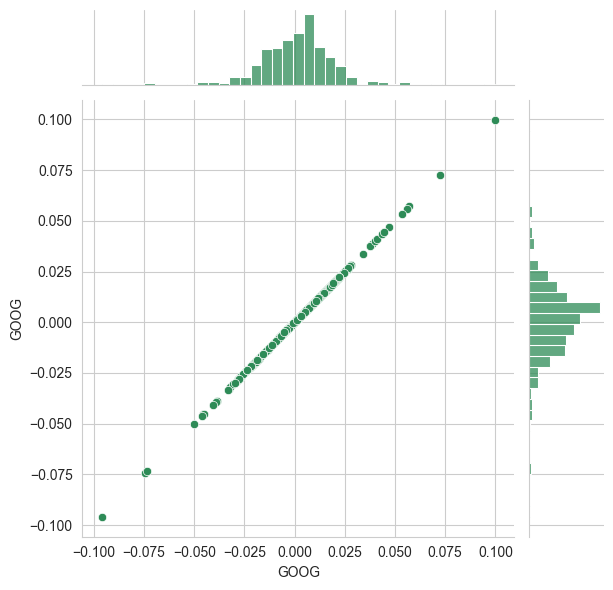

In [42]:
# Comparing Google to itself shows a perfectly linear relationship
# Graficar la comparación de Google con sí mismo (relación lineal perfecta)
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

So now we know that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare stocks with each other

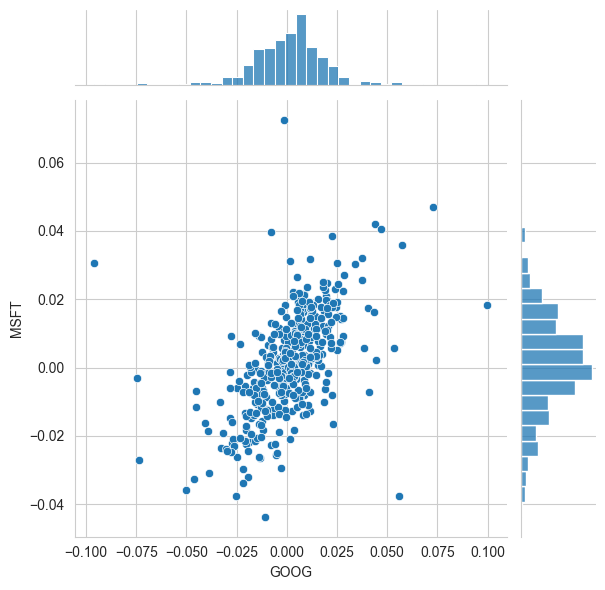

In [44]:
#Joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

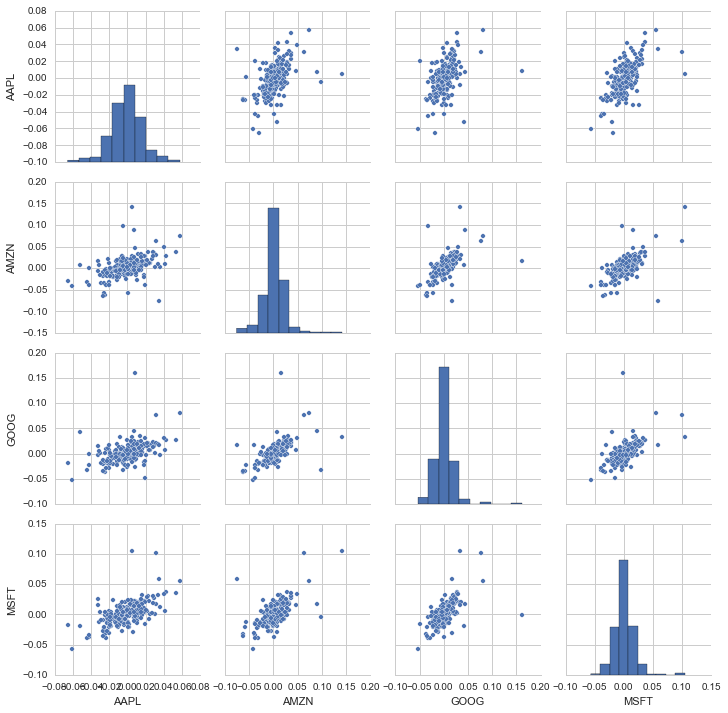

In [26]:
# Correlation analysis for every possible combination of stocks in our technology stock ticker list.
sns.pairplot(tech_rets.dropna())

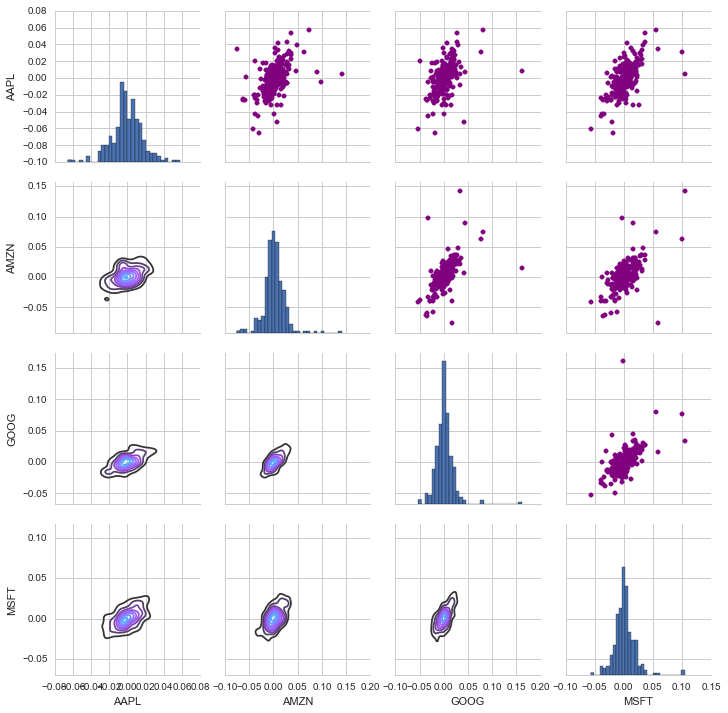

In [30]:
# Mixed plot to visualize the correlation between all technology stocks
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

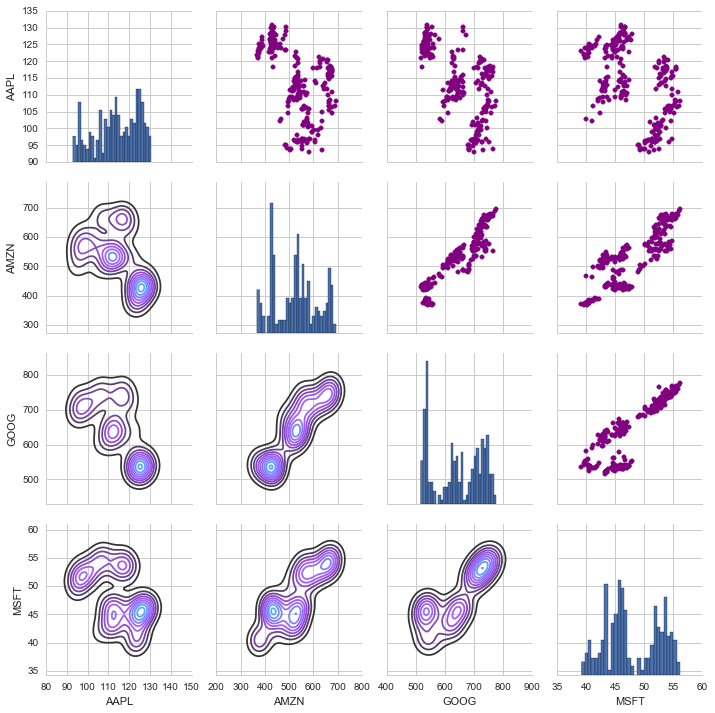

In [28]:
# Correlation analysis by using mixed types of plots for the closing price of all technology stocks
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

C:\Users\Mehul\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Mehul\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


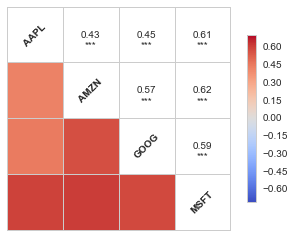

In [31]:
# Correlation plot for the daily returns of all stocks
sns.corrplot(tech_rets.dropna(),annot=True)

There are many ways we can quantify risk, one of the ways is by comparing the expected return with the standard deviation of the daily returns.

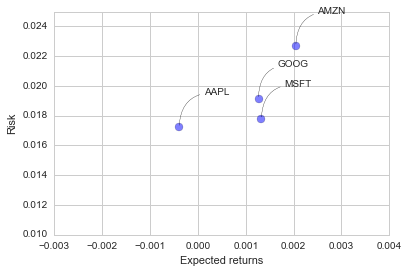

In [54]:
# Cleaning data frame by droping rows having null values
rets = tech_rets.dropna()

# Scatter plot of expected return of the stocks vs. their standard deviations of daily retunrs
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))

It can be visulaized from the above plot that Amazon stock have higher risk but offers higher returns than other stocks whereas Apple stock have lower risk but offers less return on its stock.